#### This project aims to predict machine breakdown based on the various features given in the dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import cv2

In [2]:
machine = pd.read_csv('machine_downtime.csv')
machine['Date'] = pd.to_datetime(machine['Date'], format='%d-%m-%Y')


In [3]:
print(machine.isna().sum() / len(machine))
#drop missing values since they aren't much
machine = machine.dropna()
print(machine.isna().sum())
print(machine.shape)

Date                           0.0000
Machine_ID                     0.0000
Assembly_Line_No               0.0000
Hydraulic_Pressure(bar)        0.0040
Coolant_Pressure(bar)          0.0076
Air_System_Pressure(bar)       0.0068
Coolant_Temperature            0.0048
Hydraulic_Oil_Temperature      0.0064
Spindle_Bearing_Temperature    0.0028
Spindle_Vibration              0.0044
Tool_Vibration                 0.0044
Spindle_Speed(RPM)             0.0024
Voltage(volts)                 0.0024
Torque(Nm)                     0.0084
Cutting(kN)                    0.0028
Downtime                       0.0000
dtype: float64
Date                           0
Machine_ID                     0
Assembly_Line_No               0
Hydraulic_Pressure(bar)        0
Coolant_Pressure(bar)          0
Air_System_Pressure(bar)       0
Coolant_Temperature            0
Hydraulic_Oil_Temperature      0
Spindle_Bearing_Temperature    0
Spindle_Vibration              0
Tool_Vibration                 0
Spindle_Speed(

In [4]:
# machine['Downtime'].plot()
machine_ratio = machine['Downtime'].value_counts()
print(machine_ratio)

Downtime
Machine_Failure       1231
No_Machine_Failure    1150
Name: count, dtype: int64


#### Pie chart to show the machine failure rate

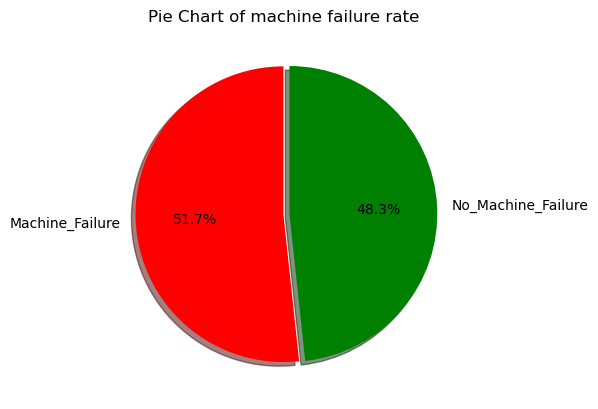

In [5]:
plt.pie(machine_ratio, labels=['Machine_Failure', 'No_Machine_Failure'], autopct='%.1f%%', \
        startangle=90, colors = ['red', 'green'], explode = (.001, .04), shadow=True);
plt.title('Pie Chart of machine failure rate');

#### From the above pie chart we can see that the instances of machine failure and no machine failure are relatively balanced. Hence we can proceed to use them in our machine learning workflow

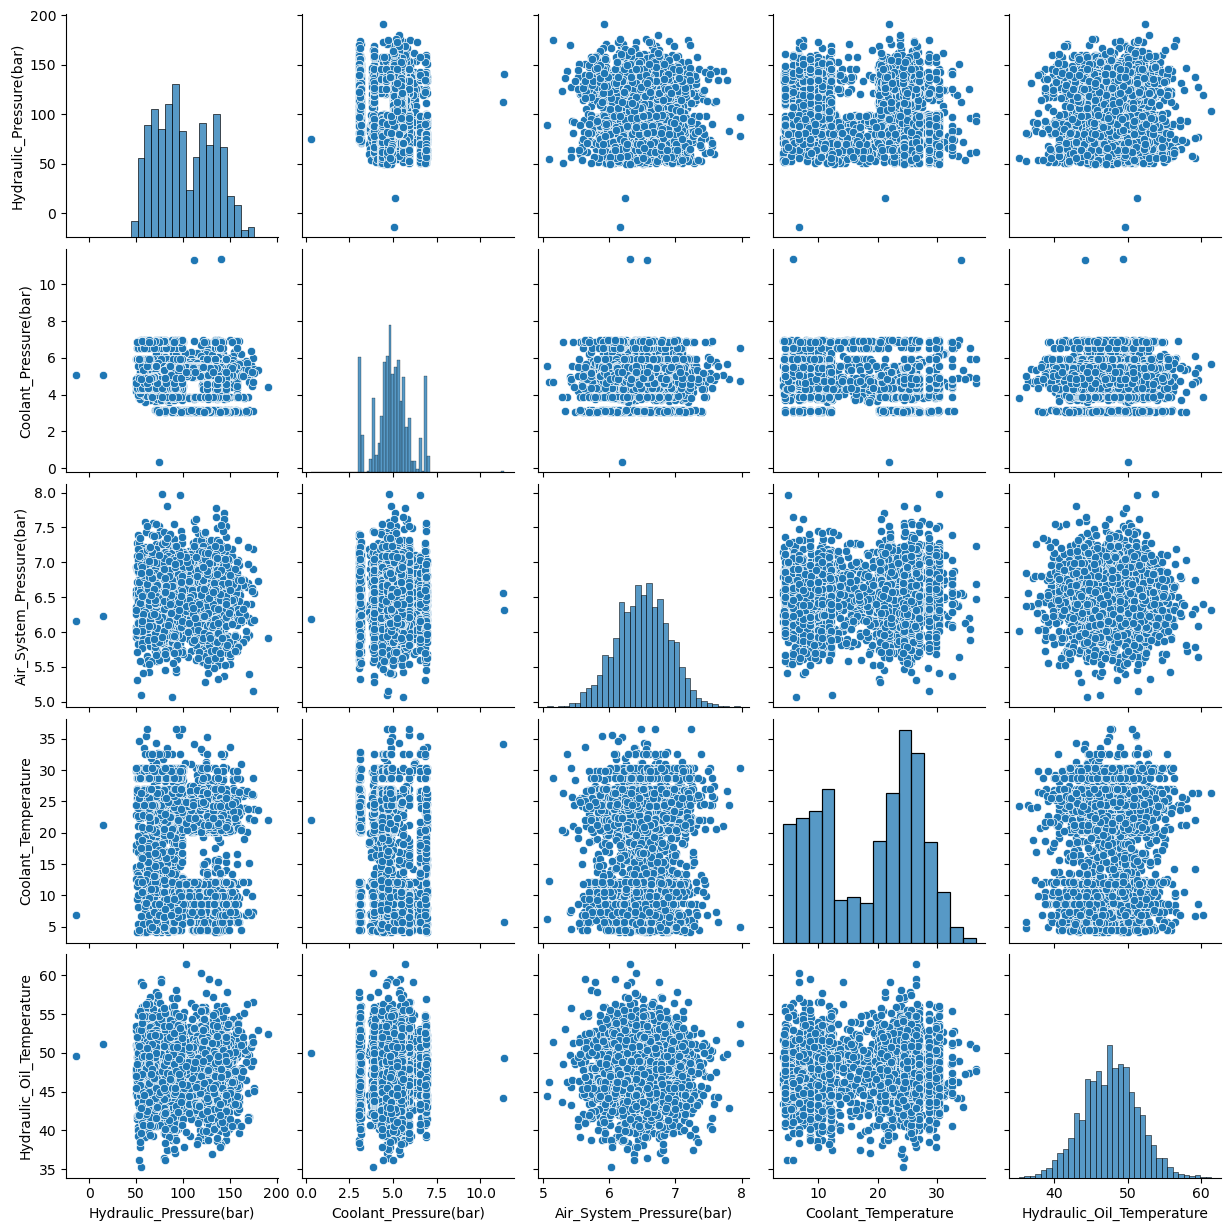

In [6]:
sns.pairplot(machine.iloc[:, 3:8])


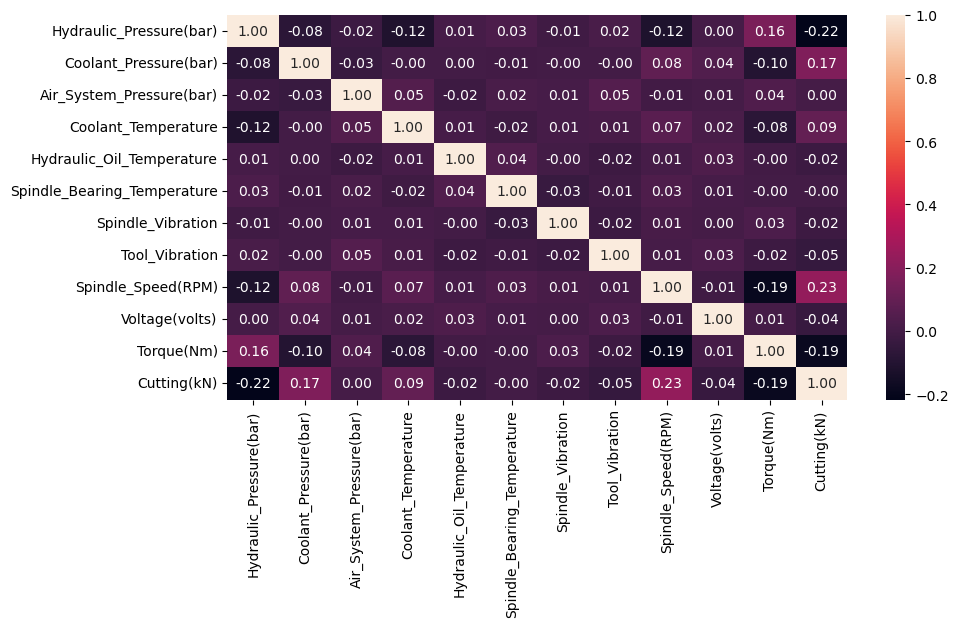

In [9]:
# Heatmap to viasualize the correlation between the numerical features
plt.subplots(figsize=(10,5))
sns.heatmap(machine.drop(['Date', 'Machine_ID', 'Assembly_Line_No', 'Downtime'],axis=1).corr(), annot=True, fmt='.2f');

In [9]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
machine_df_clean =pd.get_dummies(machine, columns=['Machine_ID', 'Assembly_Line_No'])
machine['Downtime_label'] = np.where(machine['Downtime']== 'Machine_Failure', 1, 0) 
print('Number of missing values in the machine_clean_df is {}'.format(machine_df_clean.isna().sum().sum()))
X = machine_df_clean.drop(['Date', 'Downtime', 'Downtime_label'], axis=1)
y = machine['Downtime_label'] 

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Apply min max scaler to scale the data such that the values are all between 0 and 1
min_max = MinMaxScaler()
X_train_min_max = min_max.fit_transform(X_train, y_train)
X_test_min_max =min_max.transform(X_test)

# Apply Power Transformer to scale the data 
power  =PowerTransformer()
X_train_power = power.fit_transform(X_train, y_train)
X_test_power =power.transform(X_test)

# Apply StandardScaler to the data such that it has a mean o 0 and standard deviation of 0
std_scaler = StandardScaler()
X_train_std_scaler = std_scaler.fit_transform(X_train, y_train)
X_test_std_scaler =std_scaler.transform(X_test)


Number of missing values in the machine_clean_df is 0


In [10]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_min_max, y_train)
rf_preds = rf_clf.predict(X_test_min_max)
print('Accuracy score on the Random Forest Classifier {:.2f}'.format(accuracy_score(y_test, rf_preds)))

ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train_min_max, y_train)
ada_preds = ada_clf.predict(X_test_min_max)
print('Accuracy score on the Ada Classifier {:.2f}'.format(accuracy_score(y_test, ada_preds)))

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_min_max, y_train)
gb_preds = gb_clf.predict(X_test_min_max)
print('Accuracy score on the Gradient Boosting Classifier {:.2f}'.format(accuracy_score(y_test, gb_preds)))

Accuracy score on the Random Forest Classifier 0.99


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy score on the Ada Classifier 1.00
Accuracy score on the Gradient Boosting Classifier 0.99


In [11]:
# We check the training and test score for the random forest to ensure the model is not over fitting the data
print('Training score for the Random Forest: {}'.format(rf_clf.score(X_train_min_max, y_train)))
print('Training score for the Random Forest: {}'.format(rf_clf.score(X_test_min_max, y_test)))

# We check the training and test score for the ada boost to ensure the model is not over fitting the data
print('Training score for the Ada Boost: {}'.format(ada_clf.score(X_train_min_max, y_train)))
print('Training score for the Ada Boost: {}'.format(ada_clf.score(X_test_min_max, y_test)))

# We check the training and test score for the gradient boost to ensure the model is not over fitting the data
print('Training score for the Gradient Boost: {}'.format(gb_clf.score(X_train_min_max, y_train)))
print('Training score for the Gradient Boost: {}'.format(gb_clf.score(X_test_min_max, y_test)))

Training score for the Random Forest: 1.0
Training score for the Random Forest: 0.9916083916083916
Training score for the Ada Boost: 1.0
Training score for the Ada Boost: 0.9958041958041958
Training score for the Gradient Boost: 0.9993997599039616
Training score for the Gradient Boost: 0.993006993006993


In [12]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
rf_cv = cross_val_score(rf_clf, X_train_min_max, y_train, cv=10)
ada_cv = cross_val_score(ada_clf, X_train_min_max, y_train, cv=10)
gb_cv = cross_val_score(gb_clf, X_train_min_max, y_train, cv=10)

In [13]:
print('Cross val score on the random forest classifier {:.4f}'.format(np.mean(rf_cv)))
print('Cross val score on the ada boost classifier {:.4f}'.format(np.mean(ada_cv)))
print('Cross val score on the gradient boost classifier {:.4f}'.format(np.mean(gb_cv)))

Cross val score on the random forest classifier 0.9838
Cross val score on the ada boost classifier 0.9910
Cross val score on the gradient boost classifier 0.9940


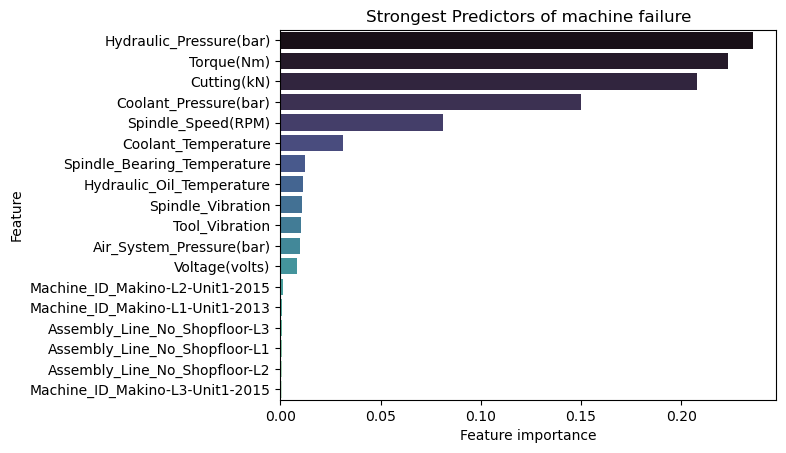

In [14]:
feature_df =pd.DataFrame({'Feature':X_train.columns, 'Feature importance':rf_clf.feature_importances_})\
                                                    .sort_values('Feature importance', ascending=False)
sns.barplot(data=feature_df, y='Feature', x='Feature importance', palette='mako')
plt.title('Strongest Predictors of machine failure');

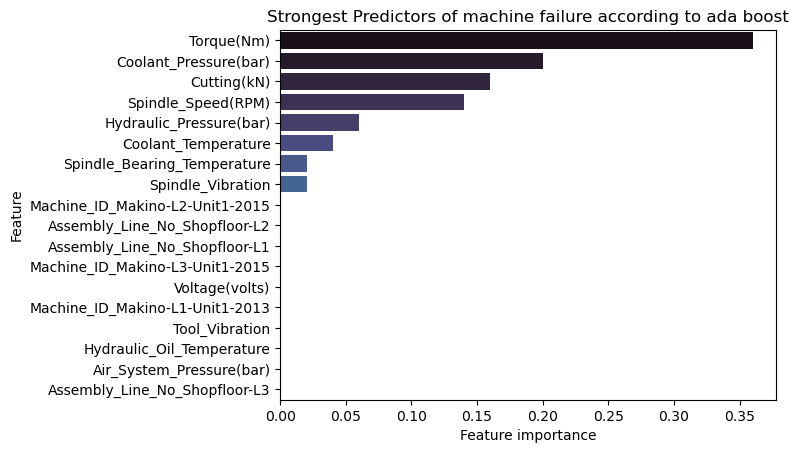

In [15]:
feature_df =pd.DataFrame({'Feature':X_train.columns, 'Feature importance':ada_clf.feature_importances_})\
                                                    .sort_values('Feature importance', ascending=False)
sns.barplot(data=feature_df, y='Feature', x='Feature importance', palette='mako')
plt.title('Strongest Predictors of machine failure according to ada boost');

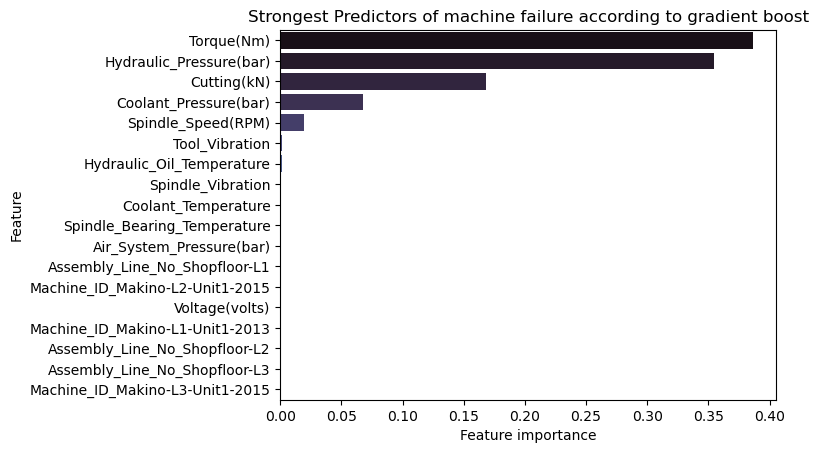

In [16]:
feature_df =pd.DataFrame({'Feature':X_train.columns, 'Feature importance':gb_clf.feature_importances_})\
                                                    .sort_values('Feature importance', ascending=False)
sns.barplot(data=feature_df, y='Feature', x='Feature importance', palette='mako')
plt.title('Strongest Predictors of machine failure according to gradient boost');

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
machine['Machine_ID_label'] = label.fit_transform(machine['Machine_ID'])
machine['Assembly_Line_No_label'] = label.fit_transform(machine['Assembly_Line_No'])
machine['Downtime'] = label.fit_transform(machine['Downtime'])


In [24]:
plt.figure(figsize=(11,7))
machine_downtime = machine[machine['Downtime']==1]
# sns.lineplot(data=machine_downtime, x='Date')

<Figure size 1100x700 with 0 Axes>

<Axes: xlabel='Date'>

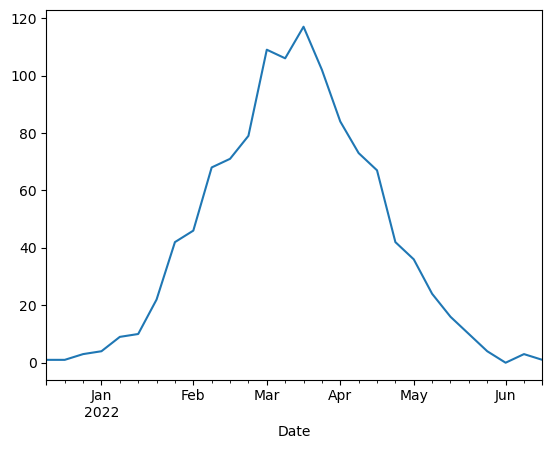

In [41]:
machine_downtime.resample('W', on='Date').size().plot()
# machine_downtime.dtypes

<Axes: xlabel='Date'>

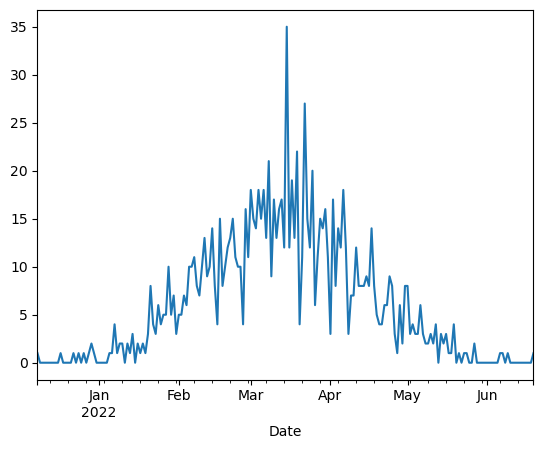

In [44]:
machine_downtime.resample('D', on='Date').size().plot()

<Axes: xlabel='Hydraulic_Pressure(bar)', ylabel='Coolant_Pressure(bar)'>

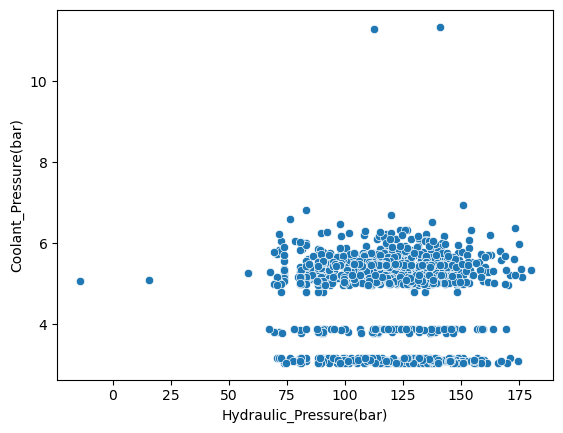

In [48]:
sns.scatterplot(data=machine_downtime, x='Hydraulic_Pressure(bar)', y='Coolant_Pressure(bar)')

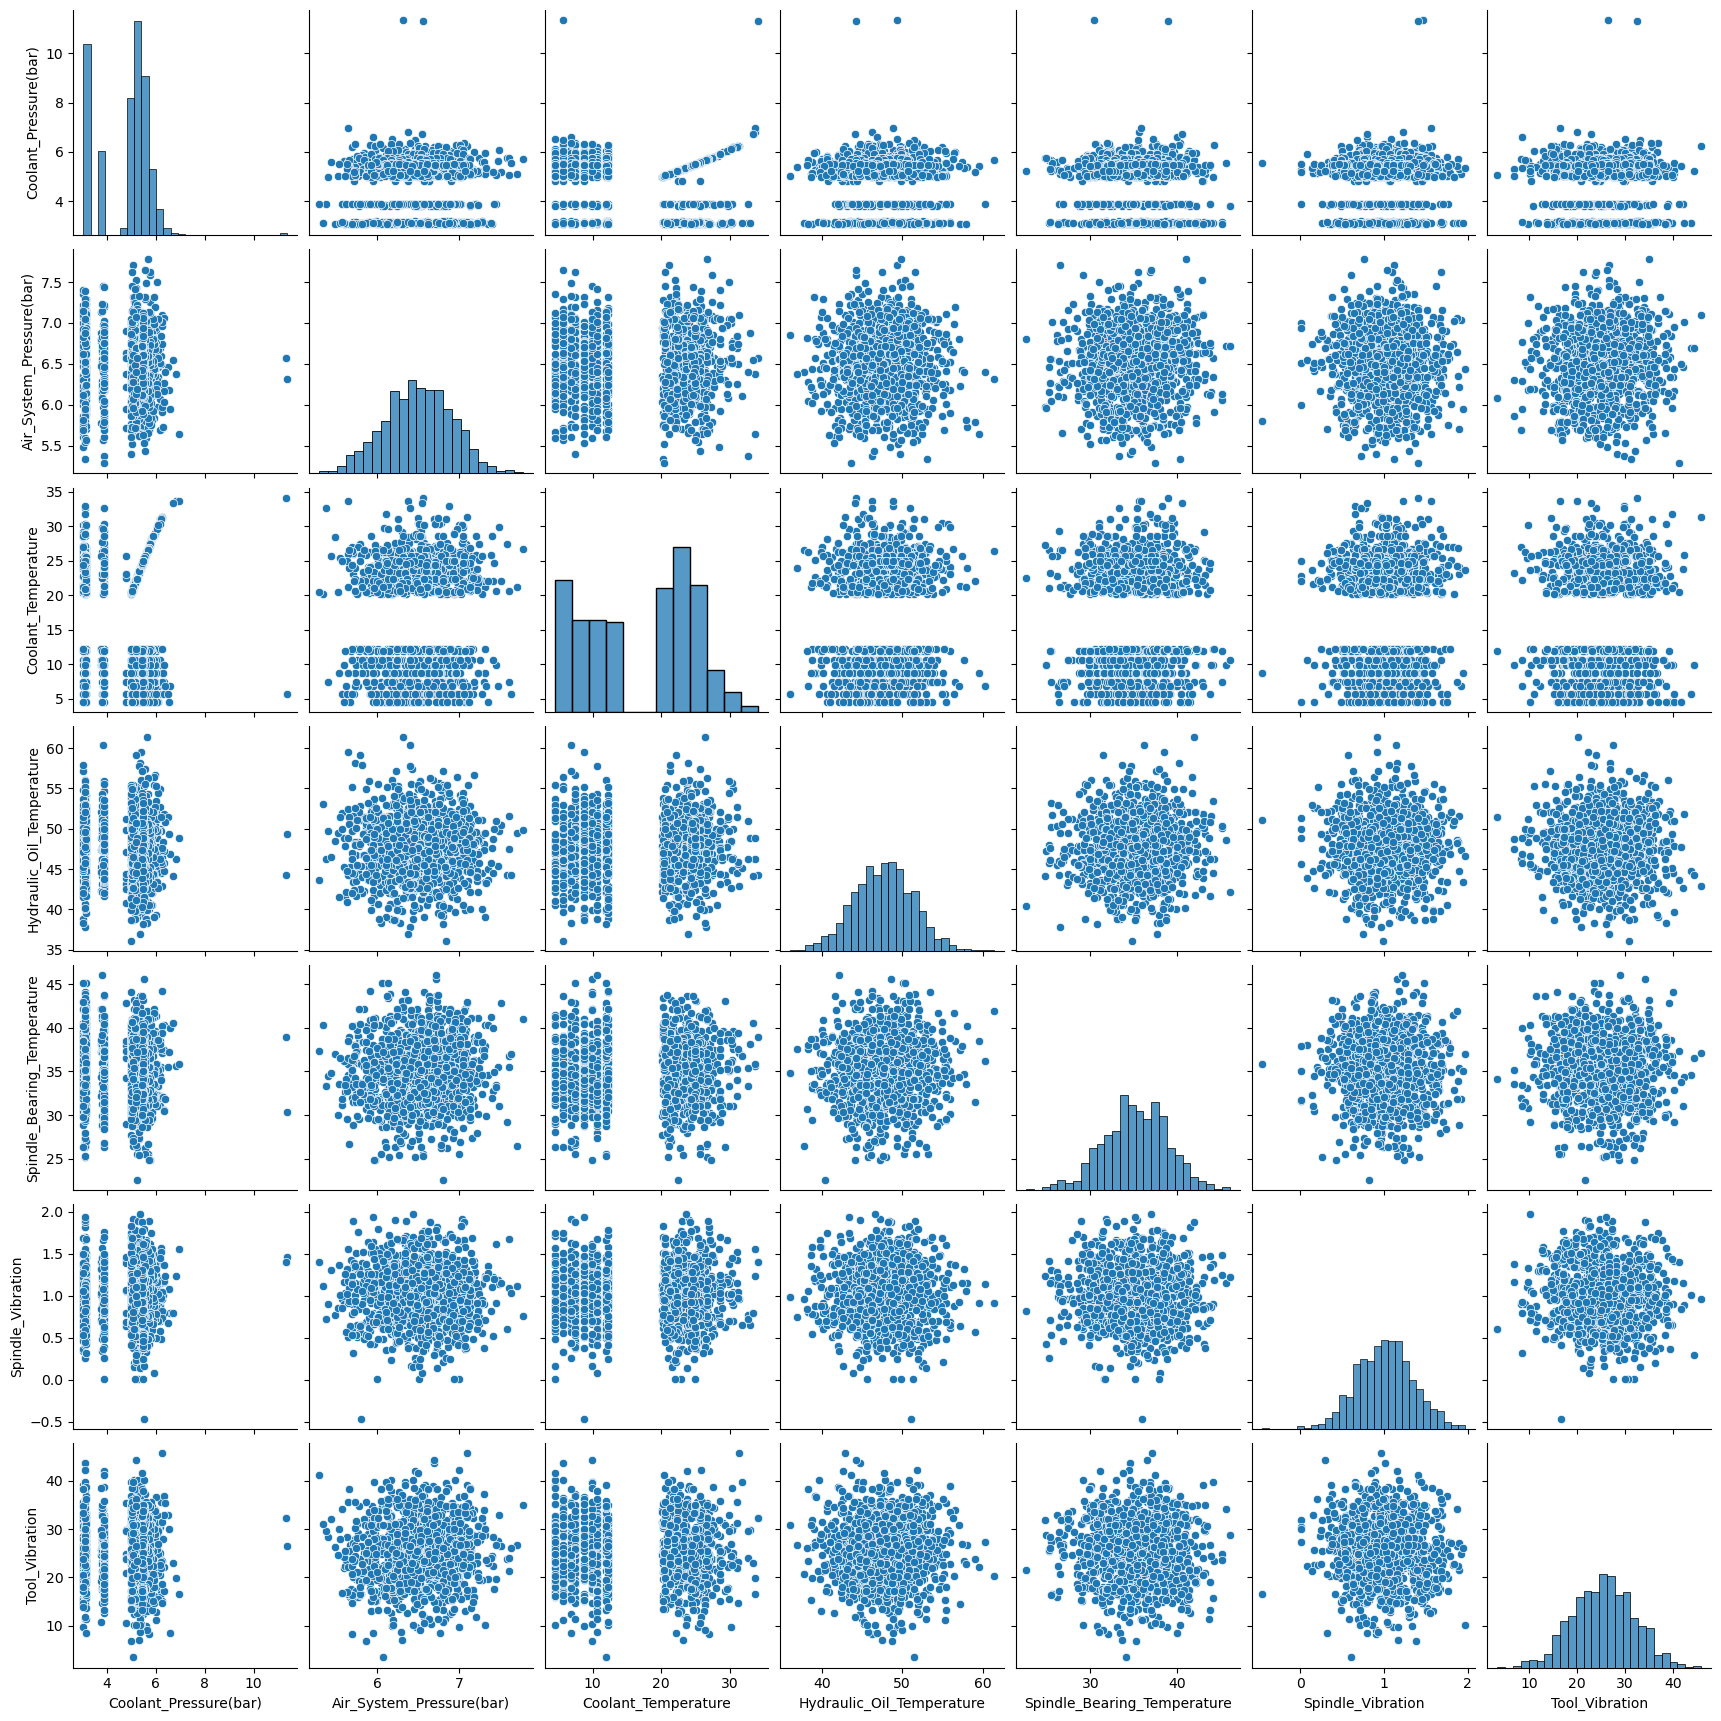

In [50]:
sns.pairplot(machine_downtime.iloc[:, 4:-8])

In [6]:
machine.shape

(2381, 16)

In [33]:
machine.groupby(['Assembly_Line_No', 'Machine_ID'])['Hydraulic_Pressure(bar)'].agg('median')

Assembly_Line_No  Machine_ID          
Shopfloor-L1      Makino-L1-Unit1-2013    94.830000
Shopfloor-L2      Makino-L2-Unit1-2015    98.760000
Shopfloor-L3      Makino-L3-Unit1-2015    95.151066
Name: Hydraulic_Pressure(bar), dtype: float64

Great! Let’s modify the **population growth model** to include **immigration (inflow of people)** and **emigration (outflow of people)** using the **12-step mathematical modeling process**.

---

### **Step 1: Identify the Problem**  
We want to model how a population changes over time while accounting for birth rate, death rate, **immigration** (people entering), and **emigration** (people leaving).  

### **Step 2: Make Assumptions**  
- The population grows continuously over time.  
- The birth rate (\( b \)) and death rate (\( d \)) remain constant.  
- Immigration (\( I \)) and emigration (\( E \)) are either constant or proportional to population size.  
- There are no sudden disasters or external shocks.  

### **Step 3: Define Variables**  
- \( x(t) \): Population size at time \( t \).  
- \( b \): Per capita birth rate.  
- \( d \): Per capita death rate.  
- \( I \): Immigration rate (number of people entering per unit time).  
- \( E \): Emigration rate (number of people leaving per unit time).  
- \( r = b - d \): Net natural growth rate.  

### **Step 4: Establish Relationships**  
The **total rate of population change** now considers **births, deaths, immigration, and emigration**:  
\[
\frac{dx}{dt} = bx(t) - dx(t) + I - E
\]
\[
\frac{dx}{dt} = r x(t) + I - E
\]
where \( r = b - d \) is the net natural growth rate.  

### **Step 5: Formulate the Model**  
The general form of the population equation with migration effects:  
\[
\frac{dx}{dt} = r x(t) + I - E
\]
If **immigration and emigration are proportional to population size**, we set:  
\[
I = \alpha x(t), \quad E = \beta x(t)
\]
where \( \alpha \) is the immigration rate and \( \beta \) is the emigration rate.  

Then, the model becomes:  
\[
\frac{dx}{dt} = (r + \alpha - \beta)x(t)
\]
Let \( r' = r + \alpha - \beta \), then:  
\[
\frac{dx}{dt} = r' x(t)
\]

### **Step 6: Solve the Model**  
This is a separable differential equation:  
\[
\int \frac{dx}{x} = \int r' dt
\]
\[
\ln x = r't + C
\]
\[
x(t) = e^C e^{r't} = x_0 e^{r't}
\]
where \( x_0 \) is the initial population at \( t = 0 \).  

If **immigration and emigration are constant (not proportional to population size)**, then:  
\[
\frac{dx}{dt} = r x(t) + I - E
\]
This is a linear differential equation, and its solution would be:  
\[
x(t) = x_0 e^{rt} + \frac{I - E}{r} (e^{rt} - 1)
\]
if \( r \neq 0 \).  

### **Step 7: Validate the Model**  
- Compare predictions with real-world migration data.  
- Check if migration rates are really constant or vary over time.  

### **Step 8: Interpret the Results**  
- If \( r' > 0 \), the population grows exponentially.  
- If \( r' < 0 \), the population declines over time.  
- If \( r' = 0 \), the population remains stable.  
- High **immigration** (\( I > E \)) leads to sustained growth, while high **emigration** (\( E > I \)) can lead to population decline.  

### **Step 9: Refine the Model**  
- Introduce **time-dependent migration rates** (e.g., due to economic factors).  
- Consider **age structure** (youths migrate more than the elderly).  
- Add **carrying capacity** to avoid unrealistic long-term exponential growth.  

### **Step 10: Test the Model**  
- Use real-world population data with migration trends.  
- Apply the model to different countries (e.g., compare developing vs. developed nations).  

### **Step 11: Implement the Model**  
- Urban planning: Predict population sizes in cities.  
- Economic policies: Adjust labor force predictions based on migration trends.  
- Immigration policies: Assess effects of policy changes on demographics.  

### **Step 12: Communicate the Model**  
- Publish in demographic studies.  
- Share insights with government and policy-makers.  
- Use visualizations (graphs, population pyramids) for better understanding.  

---

### **Final Thoughts**  
This model captures the **effects of migration** on population growth. However, real-world migration is complex—people move due to **economic, political, and environmental factors**, which can be incorporated into **more advanced models**.  

Would you like me to extend this model to include factors like **carrying capacity (logistic growth)** or **stochastic variations in migration**?

dt
dx
​
 =bx(t)−dx(t)+I−E
𝑑
𝑥
𝑑
𝑡
=
𝑟
𝑥
(
𝑡
)
+
𝐼
−
𝐸
dt
dx
​
 =rx(t)+I−E
where 
𝑟
=
𝑏
−
𝑑
r=b−d is the net natural growth 

[ \frac{dx}{dt} = bx(t) - dx(t) + I - E ] [ \frac{dx}{dt} = r x(t) + I - E ] where ( r = b - d )

\[
\frac{dx}{dt} = bx - dx + i - e
\]

\[
\frac{dx}{dt} = (b - d)x + (i - e)
\]

Let \( a = b - d \) and \( k = i - e \), so the equation becomes:

\[
\frac{dx}{dt} = ax + k
\]

Using separation of variables:

\[
\frac{dx}{ax + k} = dt
\]

Integrating both sides:

\[
\int \frac{dx}{ax + k} = \int dt
\]

Solving the left-hand side:

\[
\frac{1}{a} \ln |ax + k| + C
\]

\[
\frac{1}{a} \ln |ax + k| = at + C
\]

Taking exponentials on both sides:

\[
ax + k = C e^{at}
\]


In [19]:
lst = [2, 4, 5, 9, 20, 46]
for i in range(len(lst)):
    print(lst[i])

2
4
5
9
20
46


In [23]:
lst = []
for i in range(2, 10):
    print(i-1 + i-2)

2
4
6
8
10
12
14
16
